In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from preprocessing import PreProcess
from overview import Overview
from outlier import Outlier
from plot import Plot

In [4]:
df = pd.read_csv('../data/cleaned_data.csv')

In [28]:
df2 = pd.read_excel("../data/Week1_challenge_data_source.xlsx")

In [5]:
outlier = Outlier(df)

In [6]:
df.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


Initialize plot class

In [9]:
pl = Plot()

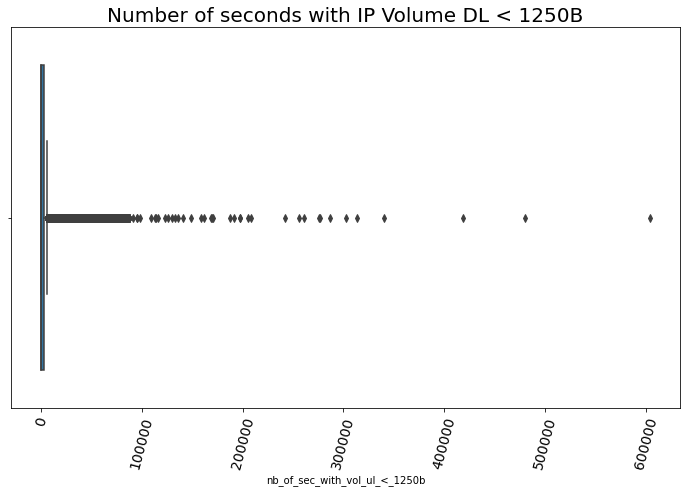

In [10]:
pl.plot_box(df, 'nb_of_sec_with_vol_ul_<_1250b', 'Number of seconds with IP Volume DL < 1250B')

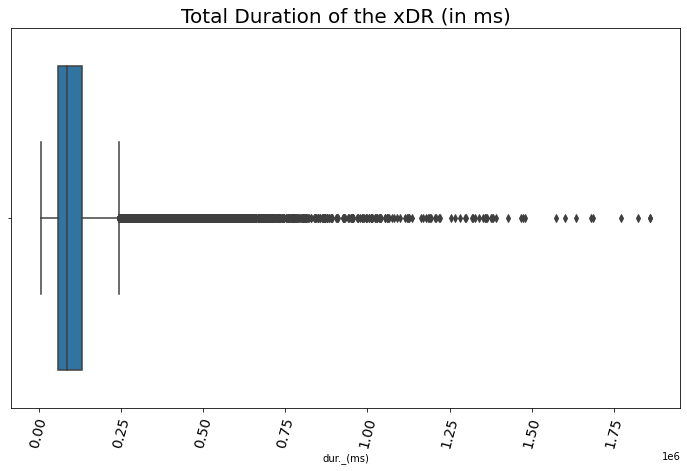

In [11]:
pl.plot_box(df, 'dur._(ms)', 'Total Duration of the xDR (in ms)')

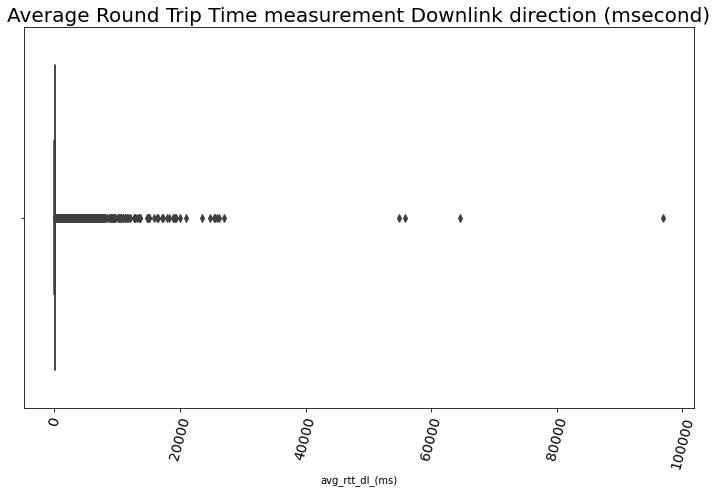

In [12]:
pl.plot_box(df, 'avg_rtt_dl_(ms)', 'Average Round Trip Time measurement Downlink direction (msecond)')

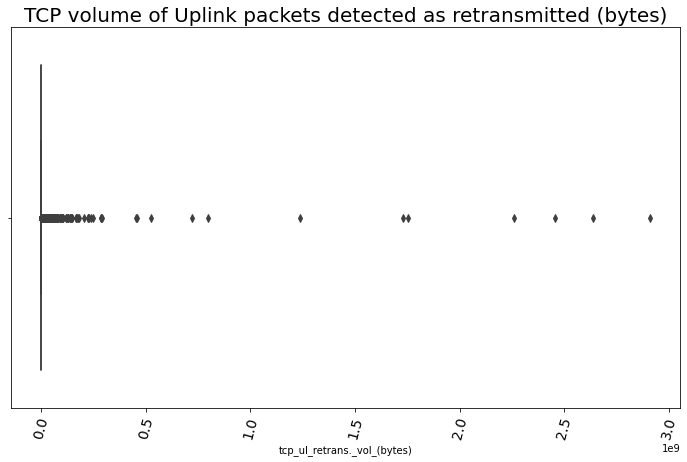

In [13]:
pl.plot_box(df, 'tcp_ul_retrans._vol_(bytes)', 'TCP volume of Uplink packets detected as retransmitted (bytes)')

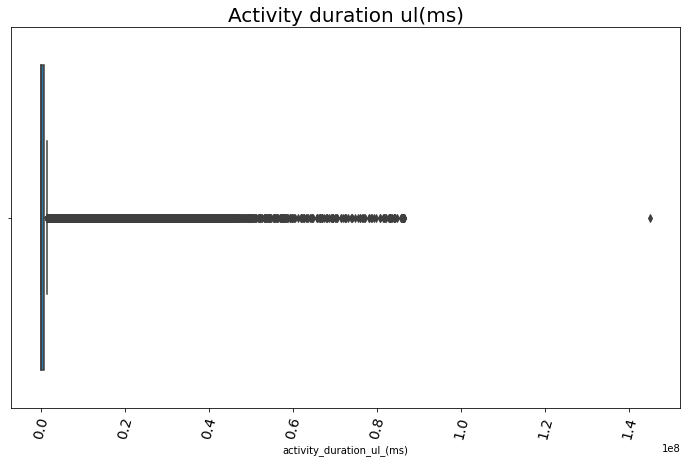

In [14]:
pl.plot_box(df, 'activity_duration_ul_(ms)', 'Activity duration ul(ms)')

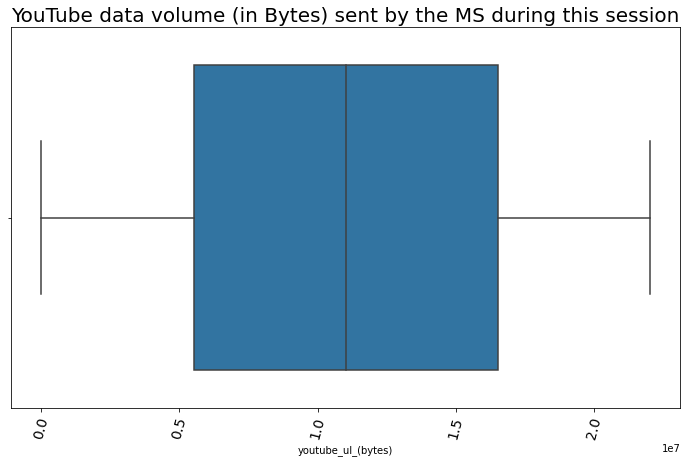

In [15]:
pl.plot_box(df, 'youtube_ul_(bytes)', 'YouTube data volume (in Bytes) sent by the MS during this session')

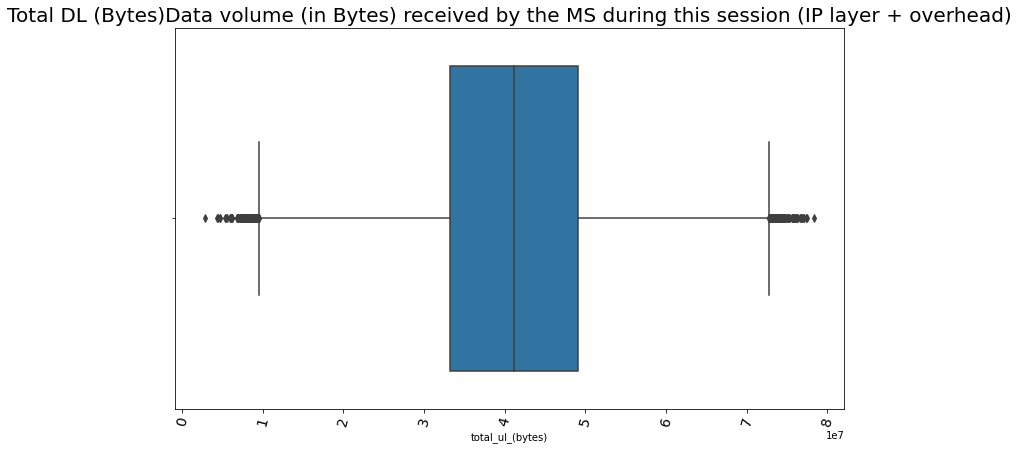

In [16]:
pl.plot_box(df, 'total_ul_(bytes)', 'Total DL (Bytes)Data volume (in Bytes) received by the MS during this session (IP layer + overhead)')

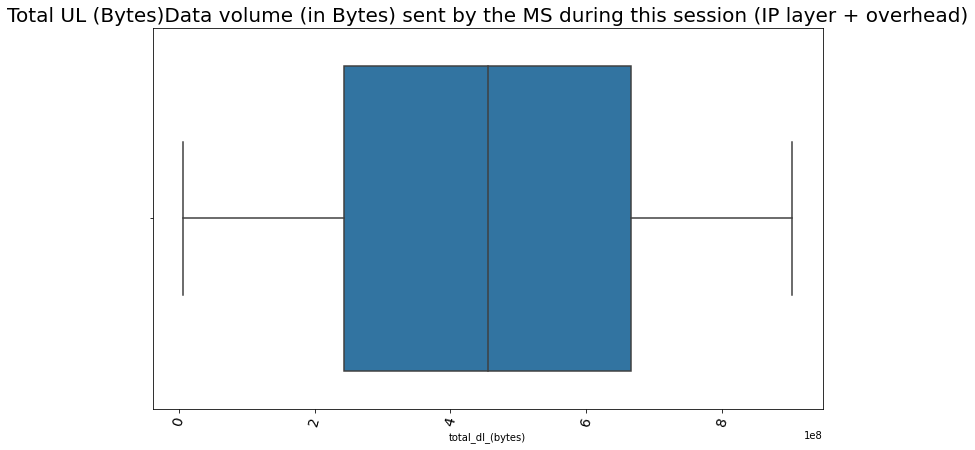

In [17]:
pl.plot_box(df, 'total_dl_(bytes)', 'Total UL (Bytes)Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)')

It can be seen that most of the column have outliers

Get Outlier overview

In [18]:
display(outlier.outlier_overview(df, 'activity_duration_ul_(ms)'))

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
38,7.277826e+18,2019-04-18 15:40:37,982.0,2019-04-25 15:40:38,33.0,604800.0,2.082095e+14,3.376394e+10,8.616400e+13,T86868A,...,21679309.0,16508079.0,23243098.0,6438422.0,213008522.0,11503163.0,295325210.0,12082520.0,49727524.0,267689014.0
535,7.277826e+18,2019-04-23 23:45:02,419.0,2019-04-24 23:45:02,313.0,86399.0,2.082017e+14,3.366726e+10,8.637690e+13,D84798A,...,15444612.0,6669529.0,6791490.0,13137110.0,202645712.0,4345867.0,41485262.0,9191686.0,36072646.0,236941106.0
554,1.304243e+19,2019-04-23 23:56:25,766.0,2019-04-24 23:56:26,385.0,86400.0,2.082017e+14,3.366344e+10,8.637690e+13,D83916A,...,16220887.0,15928572.0,10939175.0,4525125.0,603881110.0,4134867.0,228539389.0,4085765.0,29908196.0,642815619.0
630,1.304243e+19,2019-04-24 00:09:20,773.0,2019-04-25 00:09:20,678.0,86399.0,2.082015e+14,3.366045e+10,8.637690e+13,D92712B,...,20529706.0,15820629.0,7979963.0,18816877.0,690468982.0,11557228.0,41436710.0,14920555.0,64954877.0,727897527.0
651,7.277826e+18,2019-04-24 00:11:12,540.0,2019-04-25 00:11:12,513.0,86399.0,2.082017e+14,3.365830e+10,3.520271e+13,K14666C,...,2504633.0,3938252.0,562323.0,9262751.0,614815032.0,15277882.0,235703378.0,9787240.0,42450423.0,632356629.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148359,1.304243e+19,2019-04-29 07:08:38,248.0,2019-04-30 07:08:38,208.0,86399.0,2.082014e+14,3.366916e+10,8.637690e+13,T85713B,...,4679867.0,20549288.0,7150333.0,19695300.0,397284051.0,4579066.0,329851993.0,11505030.0,59572655.0,419875450.0
148408,1.304243e+19,2019-04-29 07:09:08,731.0,2019-04-30 07:09:08,745.0,86400.0,2.082017e+14,3.366057e+10,8.637690e+13,T85784A,...,12264941.0,1357151.0,21986225.0,21997101.0,529842696.0,4755600.0,17710673.0,16106399.0,44841066.0,579178272.0
148991,1.304243e+19,2019-04-29 07:16:56,675.0,2019-04-30 07:16:56,689.0,86400.0,2.082018e+14,3.366725e+10,8.637690e+13,D85941B,...,16205072.0,20135265.0,4347335.0,13449484.0,67039315.0,10111864.0,772022712.0,377322.0,45124501.0,90680481.0
148995,7.277826e+18,2019-04-29 07:16:57,452.0,2019-04-30 07:16:57,469.0,86400.0,2.082017e+14,3.376216e+10,8.637690e+13,T78199C,...,16189977.0,19719459.0,18237162.0,8180771.0,460606860.0,11194362.0,330556976.0,2329454.0,46062056.0,503379057.0


565 rows with outliers

In [19]:
display(outlier.outlier_overview(df, 'tcp_ul_retrans._vol_(bytes)'))

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
563,1.304243e+19,2019-04-24 00:00:11,698.0,2019-04-25 00:00:15,236.0,86403.0,2.082015e+14,3.365829e+10,3.592631e+13,L42997A,...,14167452.0,16687696.0,20674616.0,15219817.0,667514871.0,13291774.0,342138442.0,13294433.0,62025879.0,712700408.0
783,1.304243e+19,2019-04-24 00:22:41,489.0,2019-04-25 00:22:41,461.0,86399.0,2.082014e+14,3.366027e+10,8.654080e+13,T88349B,...,787496.0,15618631.0,12824807.0,10070595.0,832811516.0,3650083.0,405294647.0,6010671.0,37234541.0,858057935.0
815,1.304243e+19,2019-04-24 00:26:09,254.0,2019-04-25 00:26:09,177.0,86399.0,2.082010e+14,3.366228e+10,8.654080e+13,L85966B,...,14040294.0,2757831.0,17429785.0,15843551.0,41103853.0,2635642.0,672644941.0,609546.0,26706635.0,81434881.0
1236,1.304243e+19,2019-04-24 01:15:03,318.0,2019-04-25 01:15:55,734.0,86452.0,2.082017e+14,3.376314e+10,8.637690e+13,T88449B,...,4952237.0,8113457.0,22300544.0,3575703.0,231968638.0,6783826.0,672789523.0,12621381.0,35045982.0,267636706.0
1369,7.277826e+18,2019-04-24 01:26:14,132.0,2019-04-25 01:26:14,44.0,86399.0,2.082018e+14,3.366845e+10,8.637690e+13,T21355A,...,17235232.0,12879086.0,17019426.0,5646999.0,267351464.0,14525412.0,740161901.0,9615407.0,43983168.0,310983536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143416,7.277826e+18,2019-04-29 04:55:19,60.0,2019-04-30 04:55:19,674.0,86400.0,2.082019e+14,3.365802e+10,8.672620e+13,L10326C,...,19658514.0,9696167.0,10445046.0,10645489.0,69768358.0,9369007.0,422158065.0,5331060.0,39155404.0,109745693.0
143597,1.304243e+19,2019-04-29 04:59:50,318.0,2019-04-30 04:59:50,193.0,86399.0,2.082017e+14,3.365927e+10,8.637690e+13,T88844C,...,3404332.0,9622909.0,10899189.0,4644588.0,314857668.0,1998381.0,183518923.0,13099413.0,32361826.0,344894438.0
143662,7.277826e+18,2019-04-29 05:01:09,107.0,2019-04-30 05:01:07,948.0,86398.0,2.082010e+14,3.369938e+10,8.637690e+13,D93656A,...,1824702.0,20827969.0,220153.0,8444865.0,824128190.0,4161163.0,221240777.0,12139630.0,47152790.0,834468459.0
145427,1.304243e+19,2019-04-29 06:09:30,700.0,2019-04-30 06:09:31,140.0,86400.0,2.082017e+14,3.366833e+10,8.637690e+13,D88357A,...,20392237.0,9395084.0,4335545.0,15007554.0,24591692.0,14249920.0,136229675.0,7042829.0,46273702.0,59930864.0


125 rows with outliers

Calculate number of outliers for each numeric column

Select the numeric columns

In [157]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
df.dtypes

bearer_id                                   float64
start                                        object
start_ms                                    float64
end                                          object
end_ms                                      float64
dur._(ms)                                   float64
imsi                                        float64
msisdn/number                               float64
imei                                        float64
last_location_name                           object
avg_rtt_dl_(ms)                             float64
avg_rtt_ul_(ms)                             float64
avg_bearer_tp_dl_(kbps)                     float64
avg_bearer_tp_ul_(kbps)                     float64
tcp_dl_retrans._vol_(bytes)                 float64
tcp_ul_retrans._vol_(bytes)                 float64
dl_tp_<_50_kbps_(%)                         float64
50_kbps_<_dl_tp_<_250_kbps_(%)              float64
250_kbps_<_dl_tp_<_1_mbps_(%)               float64
dl_tp_>_1_mb

In [21]:
num_cols = df.select_dtypes(include=np.number).columns

In [22]:
dlist = ['bearer_id', 'start_ms', 'end_ms', 'imsi', 'msisdn/number', 'imei']

In [23]:
num_cols = [el for el in num_cols if el not in dlist]

In [24]:
# outliers_dict = outlier.calculate_num_outliers_zscore(df, num_cols)
for col in num_cols:
    sample_outliers = outlier.calculate_num_outliers_zscore(df[col])
    print(f"Outliers from Z-scores method of {col}", len(sample_outliers))

Outliers from Z-scores method of dur._(ms) 2214
Outliers from Z-scores method of avg_rtt_dl_(ms) 818
Outliers from Z-scores method of avg_rtt_ul_(ms) 751
Outliers from Z-scores method of avg_bearer_tp_dl_(kbps) 2983
Outliers from Z-scores method of avg_bearer_tp_ul_(kbps) 4269
Outliers from Z-scores method of tcp_dl_retrans._vol_(bytes) 550
Outliers from Z-scores method of tcp_ul_retrans._vol_(bytes) 97
Outliers from Z-scores method of dl_tp_<_50_kbps_(%) 3467
Outliers from Z-scores method of 50_kbps_<_dl_tp_<_250_kbps_(%) 3462
Outliers from Z-scores method of 250_kbps_<_dl_tp_<_1_mbps_(%) 3147
Outliers from Z-scores method of dl_tp_>_1_mbps_(%) 3464
Outliers from Z-scores method of ul_tp_<_10_kbps_(%) 2199
Outliers from Z-scores method of 10_kbps_<_ul_tp_<_50_kbps_(%) 2018
Outliers from Z-scores method of 50_kbps_<_ul_tp_<_300_kbps_(%) 1029
Outliers from Z-scores method of ul_tp_>_300_kbps_(%) 749
Outliers from Z-scores method of http_dl_(bytes) 552
Outliers from Z-scores method of ht

Handle outliers for each numeric column by scaling the data

In [25]:
df = outlier.handle_outliers(df, num_cols)

/home/jedi/Documents/Tenacademy/Week1/Telecom-Analysis/scripts/outlier.py:31: RuntimeWarning: divide by zero encountered in log
  df[col] = [np.log(x) for x in df[col]]


In [26]:
# outliers_dict = outlier.calculate_num_outliers_zscore(df, num_cols)
for col in num_cols:
    sample_outliers = outlier.calculate_num_outliers_zscore(df[col])
    print(f"Outliers from Z-scores method of {col}", len(sample_outliers))

Outliers from Z-scores method of dur._(ms) 500
Outliers from Z-scores method of avg_rtt_dl_(ms) 0


/home/jedi/Documents/Tenacademy/Week1/Telecom-Analysis/scripts/outlier.py:49: RuntimeWarning: invalid value encountered in double_scalars
  z_score = (i-mean)/std


Outliers from Z-scores method of avg_rtt_ul_(ms) 0
Outliers from Z-scores method of avg_bearer_tp_dl_(kbps) 0
Outliers from Z-scores method of avg_bearer_tp_ul_(kbps) 0
Outliers from Z-scores method of tcp_dl_retrans._vol_(bytes) 3049
Outliers from Z-scores method of tcp_ul_retrans._vol_(bytes) 3857
Outliers from Z-scores method of dl_tp_<_50_kbps_(%) 0
Outliers from Z-scores method of 50_kbps_<_dl_tp_<_250_kbps_(%) 0
Outliers from Z-scores method of 250_kbps_<_dl_tp_<_1_mbps_(%) 0
Outliers from Z-scores method of dl_tp_>_1_mbps_(%) 0
Outliers from Z-scores method of ul_tp_<_10_kbps_(%) 0
Outliers from Z-scores method of 10_kbps_<_ul_tp_<_50_kbps_(%) 0
Outliers from Z-scores method of 50_kbps_<_ul_tp_<_300_kbps_(%) 0
Outliers from Z-scores method of ul_tp_>_300_kbps_(%) 0
Outliers from Z-scores method of http_dl_(bytes) 2530
Outliers from Z-scores method of http_ul_(bytes) 2171
Outliers from Z-scores method of activity_duration_dl_(ms) 0
Outliers from Z-scores method of activity_durati

Data needs further preprocessing as there are some outliers in the data

In [28]:
outlier_columns = []
for col in num_cols:
    sample_outliers = outlier.calculate_num_outliers_zscore(df[col])
    if len(sample_outliers) > 0:
        outlier_columns.append(col)

/home/jedi/Documents/Tenacademy/Week1/Telecom-Analysis/scripts/outlier.py:49: RuntimeWarning: invalid value encountered in double_scalars
  z_score = (i-mean)/std


In [30]:
len(outlier_columns)

29

In [39]:
df_cop = df.copy()

Scaling the data

In [31]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
scaled_data = df.copy()

scaled_data.sample(5)

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
23788,1.304243e+19,2019-04-24 20:51:05,227.0,2019-04-25 01:12:19,596.0,9.659759,2.082019e+14,3.369881e+10,3.547731e+13,T21027C,...,16.779668,16.273675,15.670774,16.510543,20.177624,14.880406,18.702271,16.591666,17.690164,20.235792
114548,1.304243e+19,2019-04-28 00:23:07,948.0,2019-04-29 00:23:08,50.0,11.366743,2.082019e+14,3.365875e+10,8.679050e+13,D77623B,...,16.155181,15.638723,16.445166,13.377328,20.064560,16.285201,20.141725,16.186980,17.226436,20.121468
71291,7.349883e+18,2019-04-26 08:27:11,311.0,2019-04-27 08:20:49,13.0,11.362300,2.082003e+14,3.366923e+10,3.556121e+13,D96139C,...,16.457758,15.860395,16.196684,16.431135,19.364600,16.539221,20.470131,12.864253,17.501625,19.474494
30592,7.349883e+18,2019-04-24 13:18:14,572.0,2019-04-26 10:04:11,353.0,11.990128,2.082014e+14,3.366819e+10,3.554261e+13,L10245C,...,15.561512,16.878157,16.193567,14.194150,19.892186,16.389378,20.364356,14.235121,17.491255,19.941701
106894,1.311448e+19,2019-04-27 12:32:45,456.0,2019-04-29 08:53:24,374.0,11.980664,2.082019e+14,3.366176e+10,3.586511e+13,T88979B,...,15.032359,15.544011,16.325990,13.531698,19.572920,16.081830,18.404168,15.619466,17.004136,19.662753


In [40]:
df_cop[outlier_columns] = scaled_data

In [ ]:
scaled_data = minmax_scaler.fit_transform(scaled_data[outlier_columns])

In [38]:
scaled_data.shape

(150001, 29)

In [41]:
outlier_columns = []
for col in num_cols:
    sample_outliers = outlier.calculate_num_outliers_zscore(df_cop[col])
    if len(sample_outliers) > 0:
        outlier_columns.append(col)

/home/jedi/Documents/Tenacademy/Week1/Telecom-Analysis/scripts/outlier.py:49: RuntimeWarning: invalid value encountered in double_scalars
  z_score = (i-mean)/std


In [43]:
len(outlier_columns)

29

In [44]:
# outliers_dict = outlier.calculate_num_outliers_zscore(df, num_cols)
for col in num_cols:
    sample_outliers = outlier.calculate_num_outliers_zscore(df_cop[col])
    print(f"Outliers from Z-scores method of {col}", len(sample_outliers))

Outliers from Z-scores method of dur._(ms) 500
Outliers from Z-scores method of avg_rtt_dl_(ms) 0


/home/jedi/Documents/Tenacademy/Week1/Telecom-Analysis/scripts/outlier.py:49: RuntimeWarning: invalid value encountered in double_scalars
  z_score = (i-mean)/std


Outliers from Z-scores method of avg_rtt_ul_(ms) 0
Outliers from Z-scores method of avg_bearer_tp_dl_(kbps) 0
Outliers from Z-scores method of avg_bearer_tp_ul_(kbps) 0
Outliers from Z-scores method of tcp_dl_retrans._vol_(bytes) 3049
Outliers from Z-scores method of tcp_ul_retrans._vol_(bytes) 3857
Outliers from Z-scores method of dl_tp_<_50_kbps_(%) 0
Outliers from Z-scores method of 50_kbps_<_dl_tp_<_250_kbps_(%) 0
Outliers from Z-scores method of 250_kbps_<_dl_tp_<_1_mbps_(%) 0
Outliers from Z-scores method of dl_tp_>_1_mbps_(%) 0
Outliers from Z-scores method of ul_tp_<_10_kbps_(%) 0
Outliers from Z-scores method of 10_kbps_<_ul_tp_<_50_kbps_(%) 0
Outliers from Z-scores method of 50_kbps_<_ul_tp_<_300_kbps_(%) 0
Outliers from Z-scores method of ul_tp_>_300_kbps_(%) 0
Outliers from Z-scores method of http_dl_(bytes) 2530
Outliers from Z-scores method of http_ul_(bytes) 2171
Outliers from Z-scores method of activity_duration_dl_(ms) 0
Outliers from Z-scores method of activity_durati

/home/jedi/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot:>

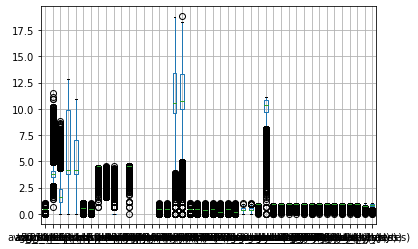

In [46]:
df_cop[num_cols].boxplot()

Most of the outliers have been handled

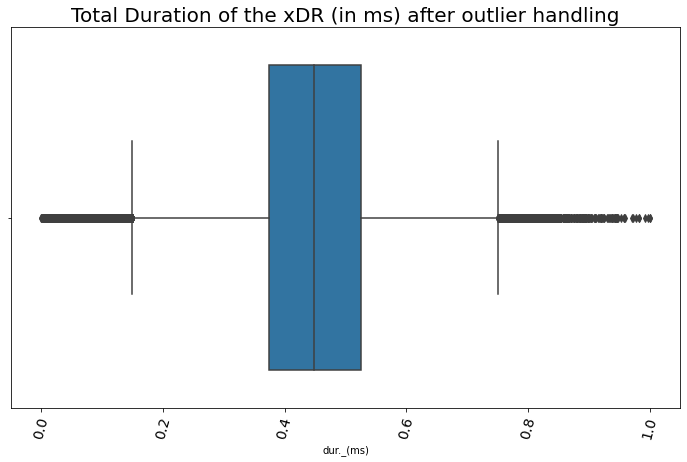

In [53]:
pl.plot_box(df_cop, 'dur._(ms)', 'Total Duration of the xDR (in ms) after outlier handling')

In [55]:
df_cop.describe()

/home/jedi/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,bearer_id,start_ms,end_ms,dur._(ms),imsi,msisdn/number,imei,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
count,1.500010e+05,150001.000000,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,...,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000
mean,1.012045e+19,499.188199,498.800888,0.439023,2.082016e+14,4.182441e+10,4.842592e+13,-inf,-inf,-inf,...,0.923116,0.918437,0.924240,0.925019,0.921345,0.920386,0.919480,0.913696,0.792328,0.813121
std,2.892438e+18,288.610872,288.096693,0.131061,2.144723e+10,2.438731e+12,2.238739e+13,NaN,NaN,NaN,...,0.076958,0.081745,0.075821,0.074999,0.078754,0.079740,0.080658,0.086596,0.092031,0.156937
min,6.917538e+18,0.000000,0.000000,0.000000,2.040471e+14,3.360100e+10,4.400152e+11,-inf,-inf,-inf,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.349883e+18,250.000000,251.000000,0.374827,2.082014e+14,3.365151e+10,3.546261e+13,3.555348e+00,1.098612e+00,3.761200e+00,...,0.893543,0.887084,0.894682,0.895803,0.890892,0.889277,0.888433,0.880881,0.740687,0.729090
50%,7.349883e+18,499.000000,500.000000,0.448219,2.082015e+14,3.366371e+10,3.572201e+13,3.806662e+00,1.609438e+00,4.143135e+00,...,0.946558,0.943486,0.947668,0.948020,0.945832,0.944860,0.944361,0.940247,0.805338,0.858877
75%,1.304243e+19,749.000000,750.000000,0.525004,2.082018e+14,3.368307e+10,8.611970e+13,4.127134e+00,2.397895e+00,9.888881e+00,...,0.977875,0.976554,0.978359,0.978446,0.977462,0.977148,0.976788,0.975011,0.858383,0.937063
max,1.318654e+19,999.000000,999.000000,1.000000,2.140743e+14,8.823971e+14,9.900120e+13,1.148167e+01,8.870663e+00,1.284307e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Save the data



In [56]:
df_cop.to_csv('../data/cleaned_data_outliers.csv', index=False)